In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage

from keras import models
from keras import layers
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import DenseNet121
from keras.applications.xception import Xception
from keras.models import Model


from keras.preprocessing import image
import os, shutil

In [2]:
print(len(os.listdir('../pet_data/train_images/')))
print(len(os.listdir('../pet_data/test_images/')))

10331
15040


In [3]:
bread_labels = pd.read_csv('../pet_data/breed_labels.csv')
color_labels = pd.read_csv('../pet_data/color_labels.csv')
state_labels = pd.read_csv('../pet_data/state_labels.csv')
test_sample_submission = pd.read_csv('../pet_data/test/sample_submission.csv')
test = pd.read_csv('../pet_data/test/test.csv')
train = pd.read_csv('../pet_data/train.csv')
train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
all_data = pd.concat([train, test])
train_folder = '../pet_data/train_images/'
test_folder = '../pet_data/test_images/'

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [4]:
train_images = [f for f in os.listdir(train_folder) if os.path.isfile(os.path.join(train_folder, f))]
test_images = [f for f in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, f))]

In [5]:
train_images.sort()
test_images.sort()
train_images

['0008c5398-1.jpg',
 '0008c5398-5.jpg',
 '000fb9572-1.jpg',
 '000fb9572-3.jpg',
 '0011d7c25-1.jpg',
 '00156db4a-5.jpg',
 '001a1aaad-1.jpg',
 '001b1507c-2.jpg',
 '001b1507c-3.jpg',
 '002278114-10.jpg',
 '002278114-4.jpg',
 '002278114-7.jpg',
 '0038234c6-3.jpg',
 '004a26127-1.jpg',
 '0052dcf47-1.jpg',
 '00553ae55-4.jpg',
 '005afe792-10.jpg',
 '005afe792-9.jpg',
 '00648f96f-2.jpg',
 '006d301e9-1.jpg',
 '00709d75b-3.jpg',
 '007bc1db4-4.jpg',
 '007ffeccd-1.jpg',
 '007ffeccd-7.jpg',
 '007ffeccd-8.jpg',
 '00904fc2c-2.jpg',
 '0090eb457-1.jpg',
 '00a1f270a-1.jpg',
 '00af25fc0-2.jpg',
 '00b23513e-4.jpg',
 '00be0a63e-3.jpg',
 '00c19f4fa-1.jpg',
 '00e50c7a7-1.jpg',
 '00e50c7a7-2.jpg',
 '00eca0391-5.jpg',
 '00eced1f0-1.jpg',
 '010a59236-11.jpg',
 '010a59236-12.jpg',
 '010a59236-14.jpg',
 '010a59236-16.jpg',
 '010a59236-18.jpg',
 '010a59236-19.jpg',
 '010a59236-2.jpg',
 '010a59236-4.jpg',
 '01231c438-5.jpg',
 '012a1a396-10.jpg',
 '012a1a396-4.jpg',
 '0133b2a29-3.jpg',
 '0142670c8-2.jpg',
 '0149d04e7

In [6]:
pet_id_adopt_rate = pd.DataFrame([train.PetID, train.AdoptionSpeed]).transpose()

In [7]:
pet_id_adopt_rate

,PetID,AdoptionSpeed
0,86e1089a3,2
1,6296e909a,0
2,3422e4906,3
3,5842f1ff5,2
4,850a43f90,2
5,d24c30b4b,2
6,1caa6fcdb,1
7,97aa9eeac,3
8,c06d167ca,1
9,7a0942d61,4


In [8]:
image_names = []

for image_name in os.listdir('../pet_data/train_images/'):
    image_names.append(image_name)

In [9]:
image_names_df = pd.DataFrame(image_names, columns=['image_name'])
image_names_df.sort_values(by=['image_name'], ascending=True)

,image_name
4500,0008c5398-1.jpg
3162,0008c5398-5.jpg
60,000fb9572-1.jpg
1259,000fb9572-3.jpg
9764,0011d7c25-1.jpg
234,00156db4a-5.jpg
376,001a1aaad-1.jpg
8083,001b1507c-2.jpg
8153,001b1507c-3.jpg
9413,002278114-10.jpg


pull image ids from image names and place in set to remove duplicates

In [10]:
image_ids = []

for image_id in image_names_df.image_name:
    image_ids.append(image_id[:image_id.index('-')])
    

# image_ids = set(image_ids)
image_ids = list(image_ids)
image_ids.sort()
image_ids

['0008c5398',
 '0008c5398',
 '000fb9572',
 '000fb9572',
 '0011d7c25',
 '00156db4a',
 '001a1aaad',
 '001b1507c',
 '001b1507c',
 '002278114',
 '002278114',
 '002278114',
 '0038234c6',
 '004a26127',
 '0052dcf47',
 '00553ae55',
 '005afe792',
 '005afe792',
 '00648f96f',
 '006d301e9',
 '00709d75b',
 '007bc1db4',
 '007ffeccd',
 '007ffeccd',
 '007ffeccd',
 '00904fc2c',
 '0090eb457',
 '00a1f270a',
 '00af25fc0',
 '00b23513e',
 '00be0a63e',
 '00c19f4fa',
 '00e50c7a7',
 '00e50c7a7',
 '00eca0391',
 '00eced1f0',
 '010a59236',
 '010a59236',
 '010a59236',
 '010a59236',
 '010a59236',
 '010a59236',
 '010a59236',
 '010a59236',
 '01231c438',
 '012a1a396',
 '012a1a396',
 '0133b2a29',
 '0142670c8',
 '0149d04e7',
 '0154e0f7b',
 '01573c686',
 '015770429',
 '015c75c9e',
 '015fdb354',
 '015fdb354',
 '0162634c2',
 '016dcf8d4',
 '016dcf8d4',
 '016dcf8d4',
 '0173c456c',
 '0173c456c',
 '017d966eb',
 '017eda6dc',
 '01928bd13',
 '01928bd13',
 '01958f464',
 '01a07b591',
 '01a985b44',
 '01a985b44',
 '01b26743c',
 '01b3

In [11]:
image_names_dataf = pd.DataFrame(image_ids, columns=['PetID'])
image_names_dataf

,PetID
0,0008c5398
1,0008c5398
2,000fb9572
3,000fb9572
4,0011d7c25
5,00156db4a
6,001a1aaad
7,001b1507c
8,001b1507c
9,002278114


In [12]:
merged_images = pd.merge(image_names_dataf, pet_id_adopt_rate, on=['PetID'], how='inner')
merged_images.sort_values('PetID')
merged_images.loc[merged_images['PetID'] == '0008c5398']


,PetID,AdoptionSpeed
0,0008c5398,3
1,0008c5398,3


In [13]:
len(merged_images)

10331

In [14]:
len(image_ids)

10331

In [15]:
image_ids2 = []

for image_id in image_names_df.image_name:
    image_ids2.append(image_id)
    

# image_ids = set(image_ids)
# image_ids2 = list(image_ids)
image_ids2.sort()
image_ids2

['0008c5398-1.jpg',
 '0008c5398-5.jpg',
 '000fb9572-1.jpg',
 '000fb9572-3.jpg',
 '0011d7c25-1.jpg',
 '00156db4a-5.jpg',
 '001a1aaad-1.jpg',
 '001b1507c-2.jpg',
 '001b1507c-3.jpg',
 '002278114-10.jpg',
 '002278114-4.jpg',
 '002278114-7.jpg',
 '0038234c6-3.jpg',
 '004a26127-1.jpg',
 '0052dcf47-1.jpg',
 '00553ae55-4.jpg',
 '005afe792-10.jpg',
 '005afe792-9.jpg',
 '00648f96f-2.jpg',
 '006d301e9-1.jpg',
 '00709d75b-3.jpg',
 '007bc1db4-4.jpg',
 '007ffeccd-1.jpg',
 '007ffeccd-7.jpg',
 '007ffeccd-8.jpg',
 '00904fc2c-2.jpg',
 '0090eb457-1.jpg',
 '00a1f270a-1.jpg',
 '00af25fc0-2.jpg',
 '00b23513e-4.jpg',
 '00be0a63e-3.jpg',
 '00c19f4fa-1.jpg',
 '00e50c7a7-1.jpg',
 '00e50c7a7-2.jpg',
 '00eca0391-5.jpg',
 '00eced1f0-1.jpg',
 '010a59236-11.jpg',
 '010a59236-12.jpg',
 '010a59236-14.jpg',
 '010a59236-16.jpg',
 '010a59236-18.jpg',
 '010a59236-19.jpg',
 '010a59236-2.jpg',
 '010a59236-4.jpg',
 '01231c438-5.jpg',
 '012a1a396-10.jpg',
 '012a1a396-4.jpg',
 '0133b2a29-3.jpg',
 '0142670c8-2.jpg',
 '0149d04e7

In [16]:
merged_images.PetID = image_ids2
merged_images

,PetID,AdoptionSpeed
0,0008c5398-1.jpg,3
1,0008c5398-5.jpg,3
2,000fb9572-1.jpg,3
3,000fb9572-3.jpg,3
4,0011d7c25-1.jpg,2
5,00156db4a-5.jpg,1
6,001a1aaad-1.jpg,2
7,001b1507c-2.jpg,1
8,001b1507c-3.jpg,1
9,002278114-10.jpg,1


In [17]:
generator_dict = {'filename': [], 'class': []}

for img in train_images:
    generator_dict['filename'].append(img)
for label in merged_images.AdoptionSpeed:
    generator_dict['class'].append(str(label))

generator_df = pd.DataFrame(generator_dict)
generator_df.head(8)

# train_image_list = []
# train_labels = []

# for img in train_images:
#     train_image_list.append(np.expand_dims(ndimage.imread('../pet_data/train_images/'+img), 0))
# for label in merged_images.AdoptionSpeed:
#     train_labels.append(label)
    

,filename,class
0,0008c5398-1.jpg,3
1,0008c5398-5.jpg,3
2,000fb9572-1.jpg,3
3,000fb9572-3.jpg,3
4,0011d7c25-1.jpg,2
5,00156db4a-5.jpg,1
6,001a1aaad-1.jpg,2
7,001b1507c-2.jpg,1


In [18]:
generator_df.head()

,filename,class
0,0008c5398-1.jpg,3
1,0008c5398-5.jpg,3
2,000fb9572-1.jpg,3
3,000fb9572-3.jpg,3
4,0011d7c25-1.jpg,2


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if sys.path[0] == '':


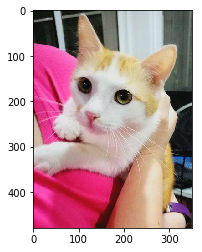

In [19]:
gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.15, 
    zoom_range=0.1,
    channel_shift_range=10.,
    horizontal_flip=True
)

image_path = '../pet_data/train_images/0008c5398-1.jpg'
image = np.expand_dims(ndimage.imread(image_path), 0)
plt.imshow(image[0])

In [20]:
aug_iter = gen.flow(train_image_list[9])
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
# plots(aug_images, figsize=(20, 7), rows=2)
plt.imshow(aug_images[0])

NameError: name 'train_image_list' is not defined

In [21]:
# datagen = ImageDataGenerator(
#     featurewise_center=False,  # set input mean to 0 over the dataset
#     samplewise_center=False,  # set each sample mean to 0
#     featurewise_std_normalization=False,  # divide inputs by std of the dataset
#     samplewise_std_normalization=False,  # divide each input by its std
#     zca_whitening=False,  # apply ZCA whitening
#     zca_epsilon=1e-06,  # epsilon for ZCA whitening
#     rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#     shear_range=0.1,  # set range for random shear
#     zoom_range=0.1,  # set range for random zoom
#     channel_shift_range=0.,  # set range for random channel shifts
#     # set mode for filling points outside the input boundaries
#     fill_mode='nearest',
#     cval=0.,  # value used for fill_mode = "constant"
#     horizontal_flip=True,  # randomly flip images
#     vertical_flip=False,  # randomly flip images
#     # set rescaling factor (applied before any other transformation)
#     rescale=1/255.,
#     # set function that will be applied on each input
#     preprocessing_function=None,
#     # image data format, either "channels_first" or "channels_last"
#     data_format=None
# )

datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

def create_generator(subset):
    return datagen.flow_from_dataframe(
        generator_df, 
        '../pet_data/train_images/', 
        x_col='filename',
        y_col='class', 
        has_ext=True,  # If image extension is given in x_col
        target_size=(100, 100), 
        color_mode='rgb',
        class_mode='categorical', 
        batch_size=128, 
        shuffle=True, 
        seed=2018,
        subset=subset
    )

train_generator = create_generator('training')
val_generator = create_generator('validation')

Found 7749 validated image filenames belonging to 5 classes.
Found 2582 validated image filenames belonging to 5 classes.


In [ ]:
import keras
keras.__version__

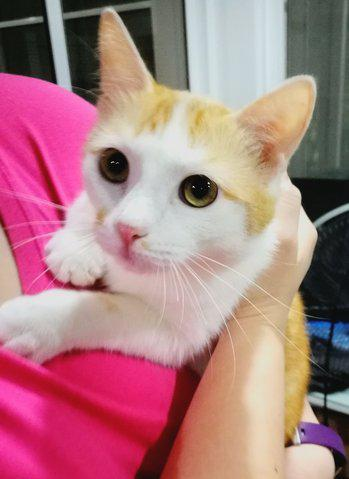

In [35]:
from IPython.display import Image
Image(filename='../pet_data/train_images/0008c5398-1.jpg') 

# image 1 is profile pic, its presumed pics with faces are removed, which explaines why it jumps from 1 to 5 for image name

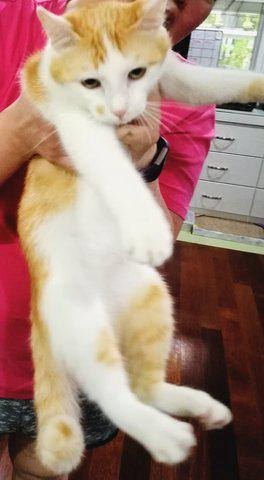

In [36]:
Image(filename='../pet_data/train_images/0008c5398-5.jpg') 

In [51]:
xception_model = Xception(include_top=False, 
                      weights='imagenet', 
                      input_tensor=None, 
                      input_shape=None, 
                      pooling=None, 
                      classes=5)
# x = xception_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.2)(x)

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(100, 100, 3)))

# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(5, activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False
output = Dense(5, activation='softmax')(base_model.output)
model = Model(base_model.input, output)

In [52]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [53]:
model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [54]:
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor='val_acc', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'
)


history = model.fit_generator(
    train_generator,
    steps_per_epoch=75000 / 128, 
    epochs=10,
    callbacks=[checkpoint],
    validation_data=val_generator,
    use_multiprocessing=True,
    workers=2, 
    verbose=1
)

Epoch 1/10
 11/585 [..............................] - ETA: 44:12 - loss: 1.6066 - acc: 0.2528

Process ForkPoolWorker-27:
Process ForkPoolWorker-29:
Process ForkPoolWorker-28:
Process ForkPoolWorker-30:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/darrenmoriarty/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/darrenmoriarty/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/darrenmoriarty/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/darrenmoriarty/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/darrenmoriarty/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/darrenmoriarty/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*se

Epoch 1/10


KeyboardInterrupt: 